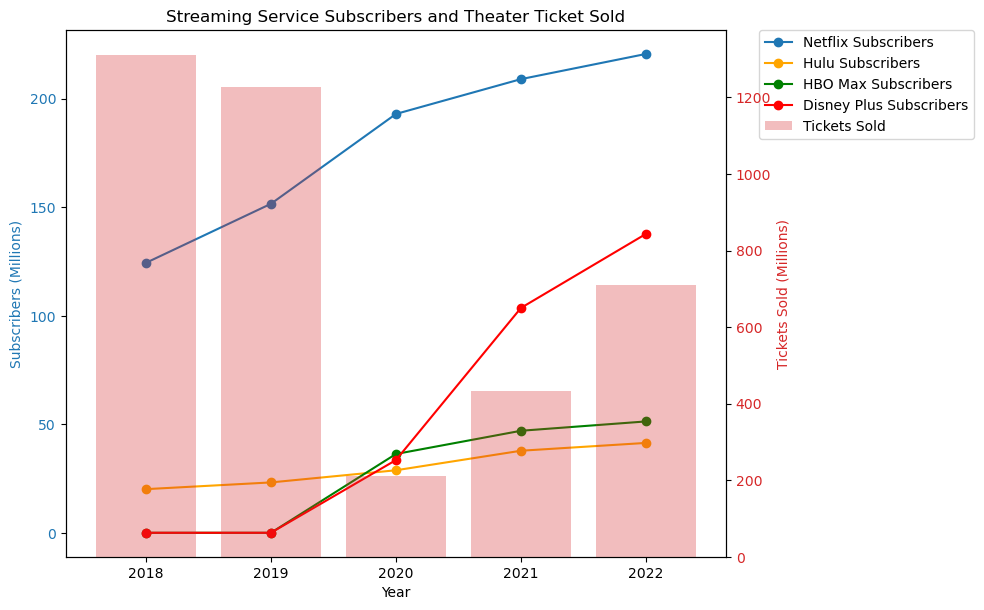

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module for formatting tick labels

# Create dataframes from the provided data (values are divided by 1 million)
subscribers_data = pd.DataFrame({
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Netflix': [124.35, 151.56, 192.95, 209, 220.6],
    'Hulu': [20.1, 23.2, 28.8, 37.8, 41.4],
    'HBO Max': [0, 0, 36.3, 47, 51.3],
    'Disney Plus': [0, 0, 33.5, 103.6, 137.7]
})

ticket_sales_data = pd.DataFrame({
    'Year': [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
             2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995],
    'Tickets Sold': [922137633, 709677708, 434086383, 211336307, 1227673842, 1310784383, 1225554386,
                     1302214022, 1323104760, 1257256418, 1339157833, 1382819090, 1282921357, 1328740720,
                     1418567388, 1358049103, 1420070454, 1401392669, 1372980280, 1495310788, 1524589620,
                     1575756527, 1465875103, 1397460079, 1444664086, 1443554850, 1357386547, 1305224361,
                     1221735652]
})

# Divide ticket sales by 1 million
ticket_sales_data['Tickets Sold'] /= 1000000

# Merge the dataframes based on 'Year'
merged_data = subscribers_data.merge(ticket_sales_data, on='Year')

# Create a line graph and a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Subscribers (Millions)', color=color)
ax1.plot(merged_data['Year'], merged_data['Netflix'], marker='o', label='Netflix Subscribers', color=color)
ax1.plot(merged_data['Year'], merged_data['Hulu'], marker='o', label='Hulu Subscribers', color='orange')
ax1.plot(merged_data['Year'], merged_data['HBO Max'], marker='o', label='HBO Max Subscribers', color='green')
ax1.plot(merged_data['Year'], merged_data['Disney Plus'], marker='o', label='Disney Plus Subscribers', color='red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Tickets Sold (Millions)', color=color)  # we already handled the x-label with ax1
ax2.bar(merged_data['Year'], merged_data['Tickets Sold'], color=color, alpha=0.3, label='Tickets Sold')
ax2.tick_params(axis='y', labelcolor=color)

# Combine the legends from both axes and place it outside the chart with a more compact size
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
combined_labels = labels + bar_labels
combined_handles = lines + bars
ax1.legend(combined_handles, combined_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Streaming Service Subscribers and Theater Ticket Sold')
plt.show()
